In [2]:
import torch
import pickle
import gzip
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [3]:
file = gzip.open("mnist.pkl.gz")
((x_train, y_train), (x_valid, y_valid), _ )=pickle.load(file, encoding='latin-1')

In [4]:
x_train[0].shape

(784,)

In [5]:
28*28

784

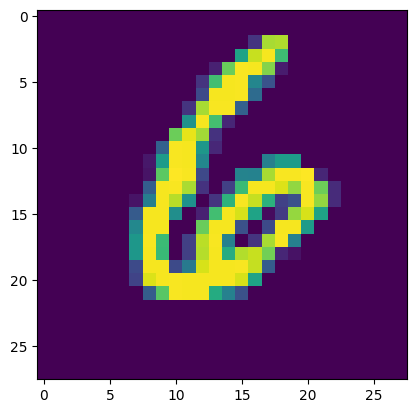

In [6]:
sample_image=x_train[13]
sample_image=sample_image.reshape((28, 28))
plt.imshow(sample_image)

In [7]:
y_train[13]

6

# Überlegungen zur Netzarchitektur

InputNeuronen: 784
OutputNeuronen: 10

    - Neuron 0 --> wenn der Wert hier am höchsten ist. Dann soll es eine 0 sein
    - Neuron 1 --> wenn der Wert hier am höchsten ist. Dann soll es eine 1 sein
    - Neuron 2 --> wenn der Wert hier am höchsten ist. Dann soll es eine 2 sein
    - Neuron 3 --> wenn der Wert hier am höchsten ist. Dann soll es eine 3 sein
    ...


In [8]:
#from sklearn.model_selection import train_test_split

In [9]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [14]:
class MySimpleNN(torch.nn.Module):
    def __init__(self, input_size=784, hidden_size=(784,300,150), output_size=10):
        super(MySimpleNN, self).__init__()

        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])

    def forward(self, xb):
        print("xb.shape", xb.shape)
        z2 = self.fc1(xb)
        print("z2.shape", z2.shape)
        a2 = torch.relu(z2)
        print("a2.shape", a2.shape)
        a2_bn = self.bn1(a2)
        print("a2_bn.shape", a2_bn.shape)

        z3 = self.fc2(a2_bn)
        print("z3.shape", z3.shape)
        a3 = torch.relu(z3)
        print("a3.shape", a3.shape)
        a3_bn = self.bn2(a3)
        print("a3_bn.shape", a3_bn.shape)

        z4 = self.fc3(a3_bn)
        print("z4.shape", z4.shape)
        a4 = torch.relu(z4)
        print("a4.shape", a4.shape)
        a4_bn = self.bn3(a4)
        print("a4_bn.shape", a4_bn.shape)

        y_hat = torch.relu(self.fc4(a4_bn))
        print("y_hat.shape", y_hat.shape)

        return y_hat

In [15]:
def get_batch(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

In [19]:
model = MySimpleNN(input_size=784, hidden_size=(784,300,150), output_size=10)
loss = nn.CrossEntropyLoss()
lr = 0.00001
batch_size = 100


def train(xb, yb):
    y_hat = model(xb)
    loss_fn = loss(y_hat, yb)
    loss_fn.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
        model.zero_grad()
    return loss.item()

losses = []
for epoch in range(50):
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_fn = train(xb, yb)
    losses.append(loss_fn)

plt.plot(losses)

xb.shape torch.Size([100, 784])
z2.shape torch.Size([100, 784])
a2.shape torch.Size([100, 784])
a2_bn.shape torch.Size([100, 784])
z3.shape torch.Size([100, 300])
a3.shape torch.Size([100, 300])
a3_bn.shape torch.Size([100, 300])
z4.shape torch.Size([100, 150])
a4.shape torch.Size([100, 150])
a4_bn.shape torch.Size([100, 150])
y_hat.shape torch.Size([100, 10])


AttributeError: 'CrossEntropyLoss' object has no attribute 'item'